In [2]:
# 导入必要的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:

df = pd.read_csv("C:\\Users\\33566\\Downloads\\Pokemon.csv", encoding='latin-1')


In [5]:
# 2. 查看并删除末尾无意义数据
print("最后5行数据:")
print(df.tail())

# 删除最后四行无意义数据
df_clean = df.iloc[:-4].copy()

最后5行数据:
             #       Name     Type 1     Type 2      Total         HP  \
805        721  Volcanion       Fire      Water        600         80   
806  undefined  undefined  undefined  undefined  undefined  undefined   
807  undefined  undefined  undefined  undefined  undefined  undefined   
808        NaN        NaN        NaN        NaN        NaN        NaN   
809        NaN        NaN        NaN        NaN        NaN        NaN   

        Attack    Defense    Sp. Atk    Sp. Def      Speed Generation  \
805        110        120        130         90         70          6   
806  undefined  undefined  undefined  undefined  undefined  undefined   
807  undefined  undefined  undefined  undefined  undefined  undefined   
808        NaN        NaN        NaN        NaN        NaN        NaN   
809        NaN        NaN        NaN        NaN        NaN        NaN   

     Legendary  
805       TRUE  
806  undefined  
807  undefined  
808             
809             


In [6]:
# 3. 处理Type 2列的异常值
# 查看Type 2列的唯一值
print("Type 2列唯一值:")
print(df_clean['Type 2'].unique())

# 查看Type 2列的值分布
type2_counts = df_clean['Type 2'].value_counts()
print("\nType 2值分布:")
print(type2_counts)

# 将错误项替换为NaN
df_clean['Type 2'] = df_clean['Type 2'].replace(['A', '273', '0', 'BBB'], np.nan)


Type 2列唯一值:
['Poison' nan 'Flying' 'Dragon' '0' 'Ground' '273' 'Fairy' 'Grass'
 'Fighting' 'Psychic' 'Steel' 'Ice' 'A' 'Rock' 'Dark' 'Water' 'Electric'
 'Fire' 'Ghost' 'Bug' 'BBB' 'Normal']

Type 2值分布:
Type 2
Flying      98
Poison      37
Ground      35
Psychic     33
Fighting    26
Grass       25
Fairy       23
Steel       22
Dark        20
Dragon      18
Rock        14
Ghost       14
Water       14
Ice         14
Fire        12
Electric     6
Normal       4
Bug          3
A            1
273          1
0            1
BBB          1
Name: count, dtype: int64


In [7]:
# 4. 检查并删除重复行
duplicates = df_clean.duplicated()
print(f"重复行数量: {duplicates.sum()}")

if duplicates.sum() > 0:
    print("重复的行:")
    print(df_clean[duplicates])
    # 删除重复行，保留第一个出现的数据
    df_clean = df_clean.drop_duplicates()

print(f"删除重复值后数据形状: {df_clean.shape}")

重复行数量: 5
重复的行:
       #       Name  Type 1  Type 2 Total  HP Attack Defense Sp. Atk Sp. Def  \
15    11    Metapod     Bug     NaN   205  50     20      55      25      25   
23    17  Pidgeotto  Normal  Flying   349  63     60      55      50      50   
185  168    Ariados     Bug  Poison   390  70     90      70      60      60   
186  168    Ariados     Bug  Poison   390  70     90      70      60      60   
187  168    Ariados     Bug  Poison   390  70     90      70      60      60   

    Speed Generation Legendary  
15     30          1     FALSE  
23     71          1     FALSE  
185    40          2     FALSE  
186    40          2     FALSE  
187    40          2     FALSE  
删除重复值后数据形状: (801, 13)


重复行数量: 0
删除重复值后数据形状: (801, 13)


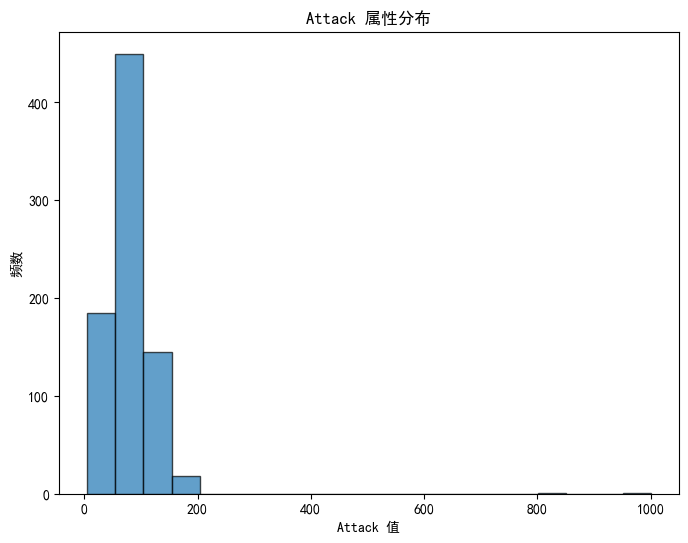

Q1: 55.0, Q3: 100.0, IQR: 45.0
异常值边界: [-12.5, 167.5]
Attack 异常值数量: 9
异常值数据:
                        Name  Attack
9                   Squirtle   840.0
140                   Tauros  1000.0
165      MewtwoMega Mewtwo X   190.0
237  HeracrossMega Heracross   185.0
430    GroudonPrimal Groudon   180.0
432    RayquazaMega Rayquaza   180.0
435       DeoxysAttack Forme   180.0
500    GarchompMega Garchomp   170.0
717       KyuremBlack Kyurem   170.0


In [9]:
# 5. 分析Attack属性分布并处理异常值
# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

# 转换数据类型为数值型
df_clean['Attack'] = pd.to_numeric(df_clean['Attack'], errors='coerce')

# 绘制Attack属性直方图
plt.figure(figsize=(8, 6))
plt.hist(df_clean['Attack'].dropna(), bins=20, alpha=0.7, edgecolor='black')
plt.title('Attack 属性分布')
plt.xlabel('Attack 值')
plt.ylabel('频数')
plt.show()

# 使用IQR方法识别异常值
Q1 = df_clean['Attack'].quantile(0.25)
Q3 = df_clean['Attack'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"异常值边界: [{lower_bound}, {upper_bound}]")

outliers = df_clean[(df_clean['Attack'] < lower_bound) | (df_clean['Attack'] > upper_bound)]
print(f"Attack 异常值数量: {len(outliers)}")

if len(outliers) > 0:
    print("异常值数据:")
    print(outliers[['Name', 'Attack']])
    # 使用中位数替换异常值
    median_attack = df_clean['Attack'].median()
    df_clean.loc[df_clean['Attack'] > upper_bound, 'Attack'] = median_attack
    df_clean.loc[df_clean['Attack'] < lower_bound, 'Attack'] = median_attack
else:
    print("未发现异常值")

In [10]:
# 6. 修正Generation和Legendary属性的置换错误
# 查找并交换置换的属性值
for idx, row in df_clean.iterrows():
    gen_val = str(row['Generation'])
    leg_val = str(row['Legendary'])
    # 判断是否存在属性置换（Generation为文本，Legendary为数字）
    if gen_val.isalpha() and leg_val.isdigit():
        print(f"发现置换行: {row['Name']}")
        print(f"  原始: Generation={gen_val}, Legendary={leg_val}")
        # 交换值
        df_clean.at[idx, 'Generation'] = leg_val
        df_clean.at[idx, 'Legendary'] = gen_val
        print(f"  修正后: Generation={leg_val}, Legendary={gen_val}")

# 转换Generation列的数据类型为数值型
df_clean['Generation'] = pd.to_numeric(df_clean['Generation'], errors='coerce')

发现置换行: Blastoise
  原始: Generation=FALSE, Legendary=1
  修正后: Generation=1, Legendary=FALSE
发现置换行: Pikachu
  原始: Generation=FALSE, Legendary=0
  修正后: Generation=0, Legendary=FALSE
